## Семинар 7: "Методы оптимизации"

ФИО: Хапкин Артем Владимирович.

In [129]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

На этом семинаре мы попробуем сравнить различные методы оптимизации: GD, Momentum, NAG, Adagrad, Adadelta, Adam.

### Часть 1: Реализация методов

Полезная функция: plt.contour
Для всех экспериментов подберите параметры так, чтобы метод сошелся к ближайшему локальному минимуму. Все методы следует запускать из одной и той же точки.

<i> 1.1 Реализуйте методы GD, Momentum, NAG, Adagrad, Adadelta, Adam.</i>

In [130]:
#GD

# n - dimension of function's input, f - list of partial derivatives of variables

def GD(f, n, df):
    history = []
    history_wal = []
    w = 15*np.ones(n) + np.random.rand(n)
    eps = 10
    learning_rate = 0.01
    num_of_iter = 0
    while num_of_iter < 200:
        num_of_iter+=1
        cur_val = f(w)
        history.append(cur_val)
        history_wal.append(w)
        #for i in range(len(w)):
        #w[i]+= -df(list(w))[i]*learning_rate
        w = np.array([w[i] - df(list(w))[i]*learning_rate for i in range(n)]).reshape(-1)
        new_val = f(w)
        eps = abs(cur_val - new_val)
      
    return history, history_wal
    
    


In [131]:
def Momentum(f, n, df):
    history = []
    history_wal = []
    w = np.ones(n) + np.random.rand(n)
    eps = 10
    learning_rate = 0.01
    gamma = 0.9
    v_t = np.zeros(n)
    num_of_iter = 0
    while num_of_iter < 200:
        num_of_iter+=1
        cur_val = f(w)
        history.append(cur_val)
        history_wal.append(w)
        v_t = np.array([gamma * v_t[i] +  df(list(w))[i]*learning_rate for i in range(n)])
        w = np.array([w[i] - v_t[i] for i in range(n)])

        new_val = f(w)
        eps = abs(cur_val - new_val)
    return history, history_wal


In [132]:
def NAG(f, n, df):
    history = []
    history_wal = []
    w = np.ones(n) + np.random.rand(n)
    eps = 10
    learning_rate = 0.01
    gamma = 0.9
    v_t = np.zeros(n)
    num_of_iter = 0
    while num_of_iter < 200:
        num_of_iter+=1
        cur_val = f(w)
        history.append(cur_val)
        history_wal.append(w)
        v_t = np.array([gamma * v_t[i] +  df(list(w - v_t*gamma))[i]*learning_rate for i in range(n)])
        w = np.array([w[i] - v_t[i] for i in range(n)])
        new_val = f(w)
        eps = abs(cur_val - new_val)
    return history, history_wal
 

In [133]:
import math
def Adagrad(f, n, df):
    history = []
    history_wal = []
    w = np.ones(n) + np.random.rand(n)
    eps = 10
    learning_rate = 0.1
    gamma = 0.9
    num_of_iter = 0
    G = np.zeros(n)
    
    while num_of_iter < 200:
        num_of_iter+=1
        cur_val = f(w)
        history.append(cur_val)
        history_wal.append(w)
        G = np.array([G[i] + (df(list(w))[i])**2 for i in range(n)])
        w = np.array([w[i] -(learning_rate/math.sqrt(G[i] + 1e-5))*df(list(w))[i] for i in range(n)])
        new_val = f(w)
        eps = abs(cur_val - new_val)
    return history, history_wal


In [134]:
def Adadelta(f, n, df):
    w = np.ones(n) + np.random.rand(n)
    history = []
    history_wal = []
    eps = 1000000
    learning_rate = 0.01
    gamma = 0.9
    num_of_iter = 0
    E = np.zeros(n)
    Teta = np.zeros(n)
    delta = np.zeros(n)
    
    while num_of_iter < 200:
        num_of_iter+=1
        cur_val = f(w)
        history.append(cur_val)
        history_wal.append(w)
        E = np.array([E[i]*gamma + (1-gamma)*((df(list(w))[i])**2) for i in range(n)])
        delta = np.array([(math.sqrt((Teta[i] + 1e-5))/math.sqrt(E[i] + 1e-5))*df(list(w))[i] \
                          for i in range(n)])   
        w = np.array([w[i] - delta[i] for i in range(n)])
        Teta = np.array([gamma*Teta[i] + (1-gamma)*(delta[i]**2) for i in range(n)])
        new_val = f(w)
        
        eps = abs(cur_val - new_val)
        
    return history, history_wal


In [135]:
import math
def Adam(f, n, df):
    history = []
    history_wal = []
    w = np.ones(n) + np.random.rand(n)
    learning_rate = 0.01
    beta_1 = 0.0
    beta_2 = 0.999
    num_of_iter = 0
    m = 1e-7 * np.ones(n)
    v = 1e-7 * np.ones(n)
    
    while num_of_iter < 200:
        num_of_iter+=1
        cur_val = f(w)
        history.append(cur_val)
        history_wal.append(w)
        
        m = beta_1*m +(1-beta_1)*df(list(w))
        m/=(1- beta_1**(num_of_iter))
        v = beta_2*v + (1-beta_2)*np.square(df(list(w)))
        v/= (1- beta_2**(num_of_iter))
        v = np.sqrt(v + 1e-6)
        w = w - learning_rate*(np.divide(m ,v))
        new_val = f(w)
        eps = abs(cur_val - new_val)
    return history, history_wal


In [136]:
def plot(func_data, points, choice_f=3, choice_m = 'GD'):
    fig, ax1 = plt.subplots(figsize=(16, 12), 
                        subplot_kw={'projection': '3d'})

    alpha = 10
    r = np.linspace(-alpha,alpha, 15)
    X,Y= np.meshgrid(r,r)
    
    if choice_f == 1:
        l = X**2 + Y**2
        ax1.set_zlabel('$z = x^2 +y^2 $')
    if choice_f == 2:
        l = X**2* np.sin(X) + Y**2 * np.sin(Y)
        ax1.set_zlabel('$z = x^2 sin(x)+y^2 sin (y)$')
    if choice_f == 3:
        l = X**2* np.sin(X**2) + Y**2 * np.sin(Y**2)
        ax1.set_zlabel('$z = x^2 sin(x^2)+y^2 sin (y^2)$')
        
    if choice_m == 'GD':
        ax1.set_title('GD')
    if choice_m == 'Momentum':
        ax1.set_title('Momentum')
    if choice_m == 'NAG':
        ax1.set_title('NAG')
    if choice_m == 'Adagrad':
        ax1.set_title('Adagrad')
    if choice_m == 'Adadelta':
        ax1.set_title('Adadelta')
    if choice_m == 'Adam':
        ax1.set_title('Adam')
    
    
    last_value = 10
    ax1.scatter(np.array(points)[:,0][::last_value], np.array(points)[:,1][::last_value], func_data[::last_value], c='red')
    ax1.plot_wireframe(X,Y,l)
    plt.show()

In [137]:
f = lambda X: X[0]**2+X[1]**2
df = lambda X: np.array([2*X[0], 2*X[1]])


<i> 1.2 Сравните эти методы на функции $J(x, y) = x^2+y^2$</i>

In [138]:
f = lambda X: X[0]**2+X[1]**2
df = lambda X: np.array([2*X[0], 2*X[1]])


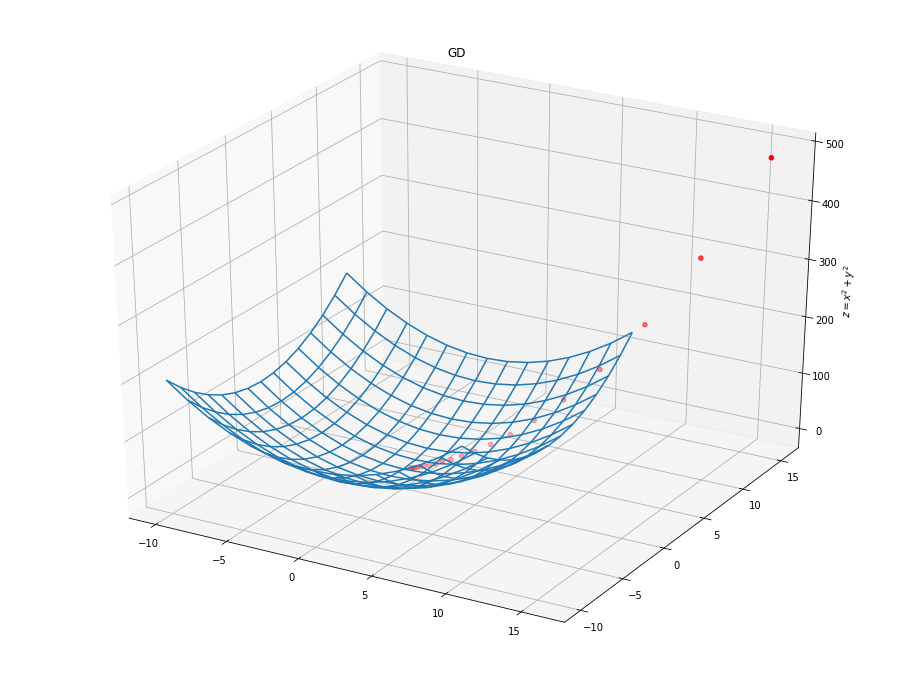

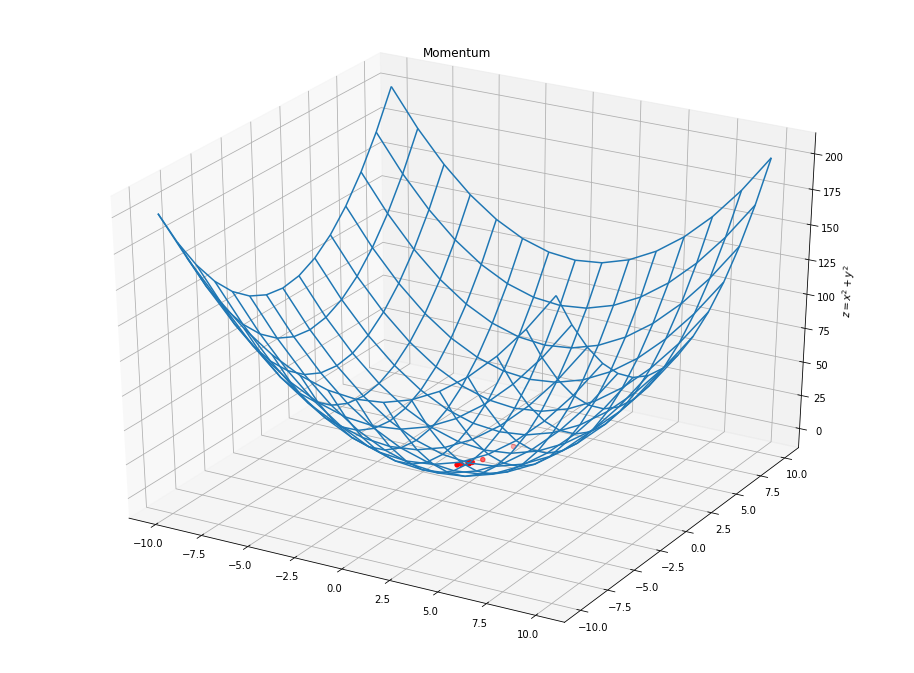

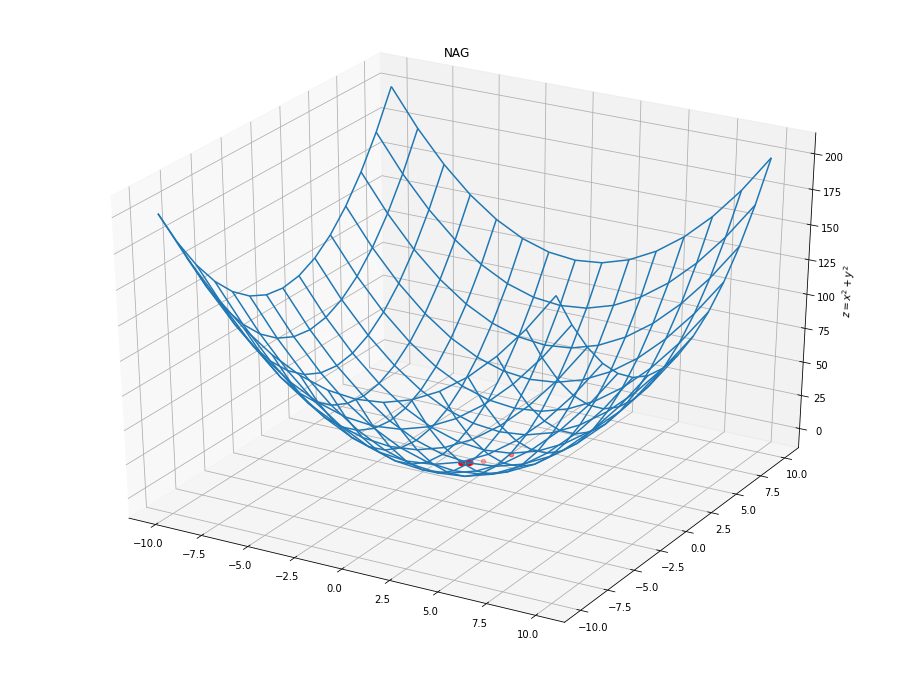

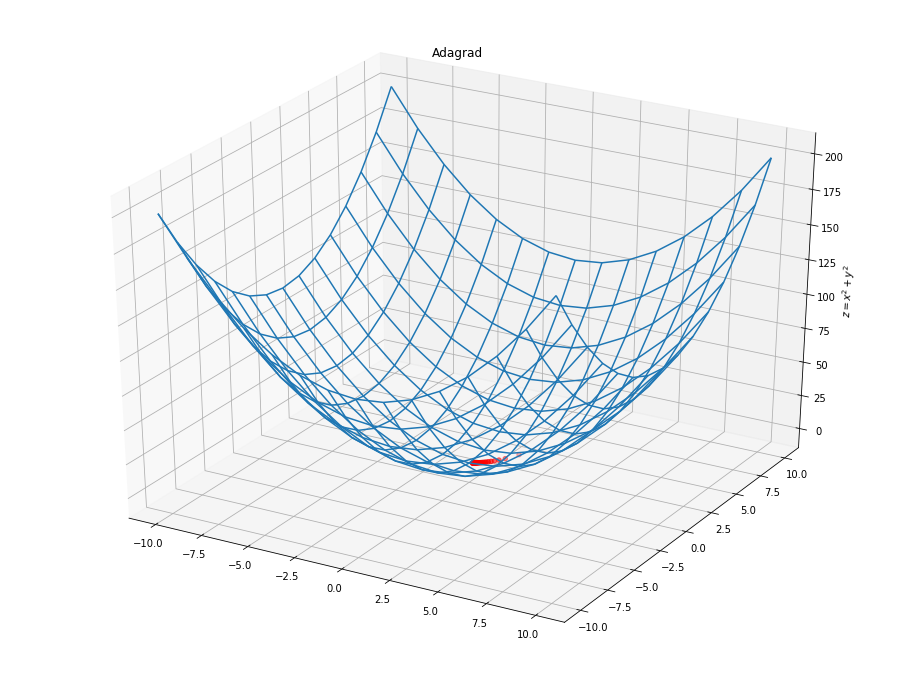

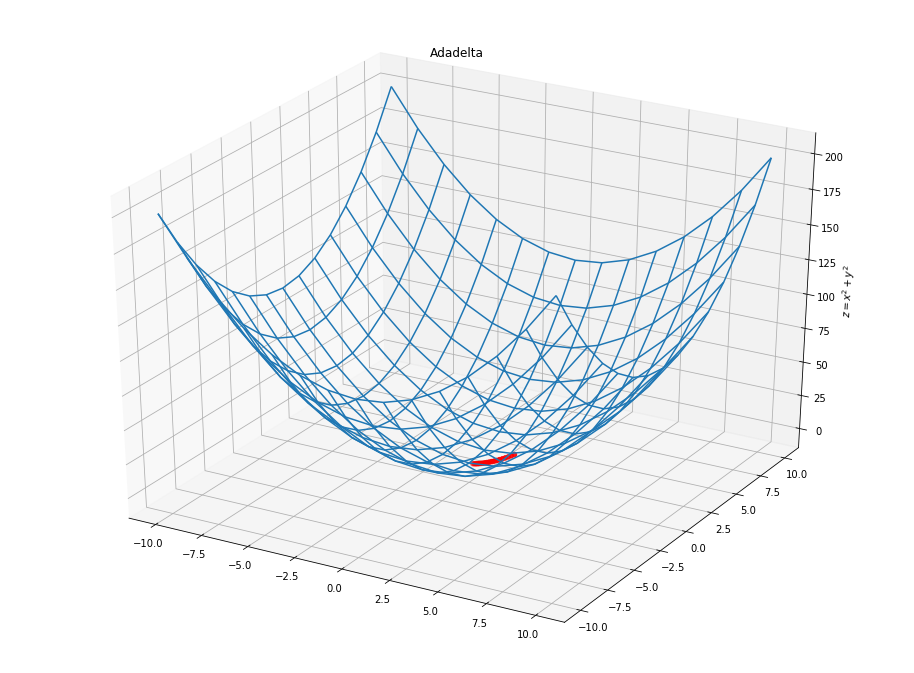

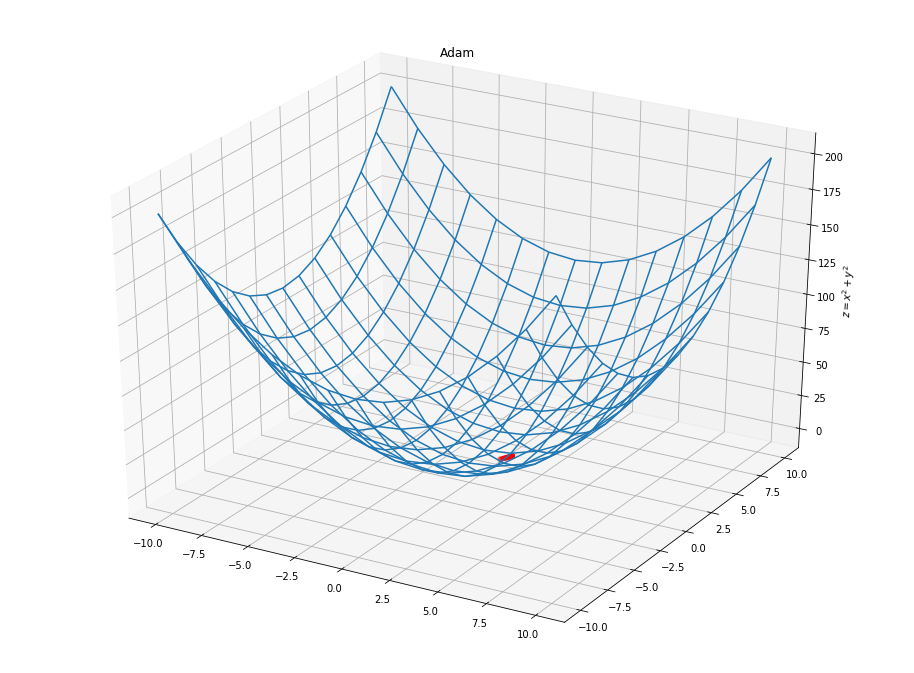

In [139]:
#Здесь взяты последние 10 точек, видно, что Adam круче всех сходится, обычный спуск - хуже всех
plot(GD(f,2,df)[0], GD(f,2,df)[1], choice_f=1, choice_m='GD')
plot(Momentum(f,2,df)[0], Momentum(f,2,df)[1], choice_f=1, choice_m='Momentum')
plot(NAG(f,2,df)[0], NAG(f,2,df)[1], choice_f=1, choice_m='NAG')
plot(Adagrad(f,2,df)[0], Adagrad(f,2,df)[1], choice_f=1, choice_m='Adagrad')
plot(Adadelta(f,2,df)[0], Adadelta(f,2,df)[1], choice_f=1, choice_m='Adadelta')
plot(Adam(f,2,df)[0], Adam(f,2,df)[1], choice_f=1, choice_m='Adam')


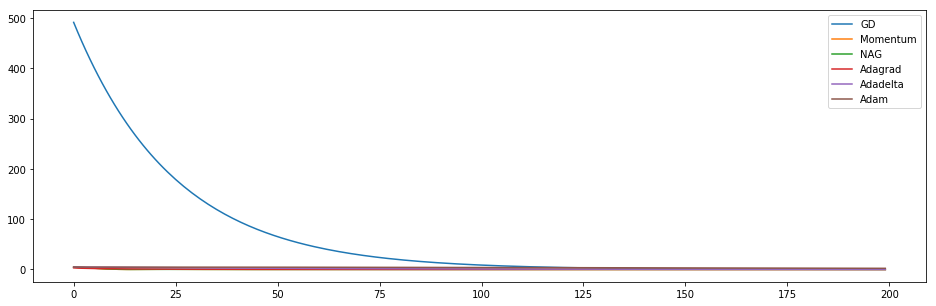

In [140]:
last_val = 50
figsize=(16, 12)
plt.figure()
plt.figure(figsize=(16, 5))
plt.plot(GD(f,2,df)[0], label = 'GD')
plt.plot(Momentum(f,2,df)[0], label = 'Momentum')
plt.plot(NAG(f,2,df)[0], label = 'NAG' )
plt.plot(Adagrad(f,2,df)[0], label = 'Adagrad')
plt.plot(Adadelta(f,2,df)[0], label = 'Adadelta')
plt.plot(Adam(f,2,df)[0], label = 'Adam')

plt.legend()

In [141]:
a = [1,2,3,4,5]
a[::-1][:3]

[5, 4, 3]

<i>1.3 Сравните эти методы на функции $J(x, y) = x^2sin(x)+y^2sin(y)$</i>

In [142]:
g = lambda X: X[0]**2 * np.sin(X[0]) + X[1]**2 *  np.sin(X[1])
dg = lambda X: np.array([2*X[0]*np.sin(X[0]) + X[0]**2 * np.cos(X[0]), 2*X[1]*np.sin(X[1]) + X[1]**2 * np.cos(X[1])])

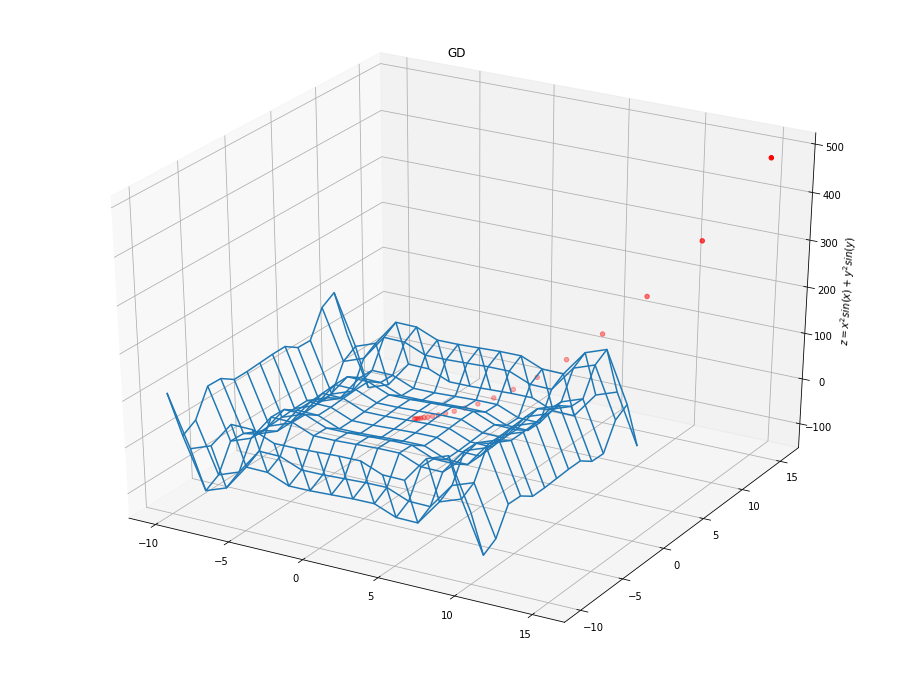

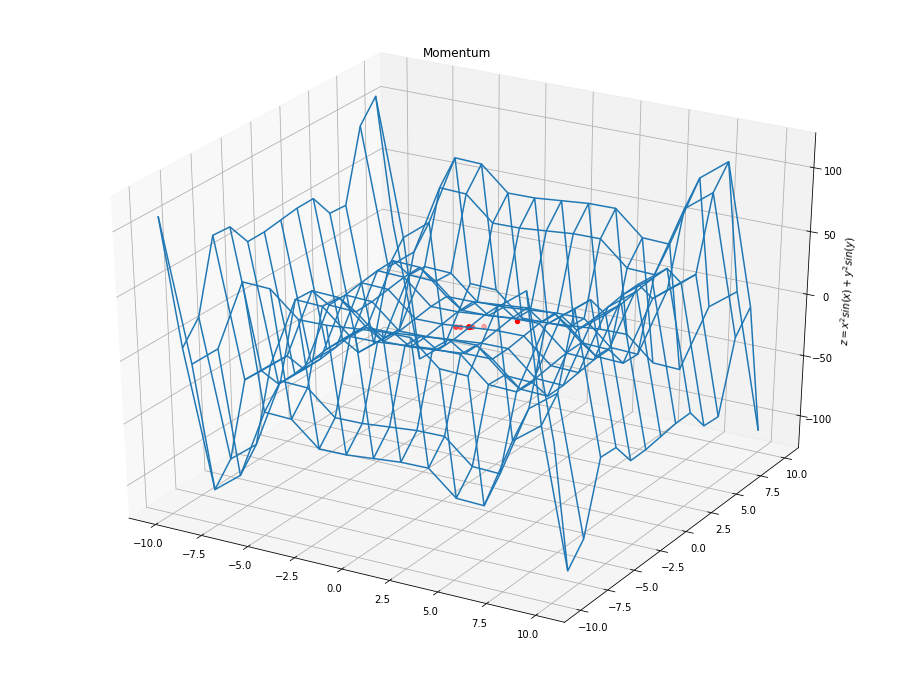

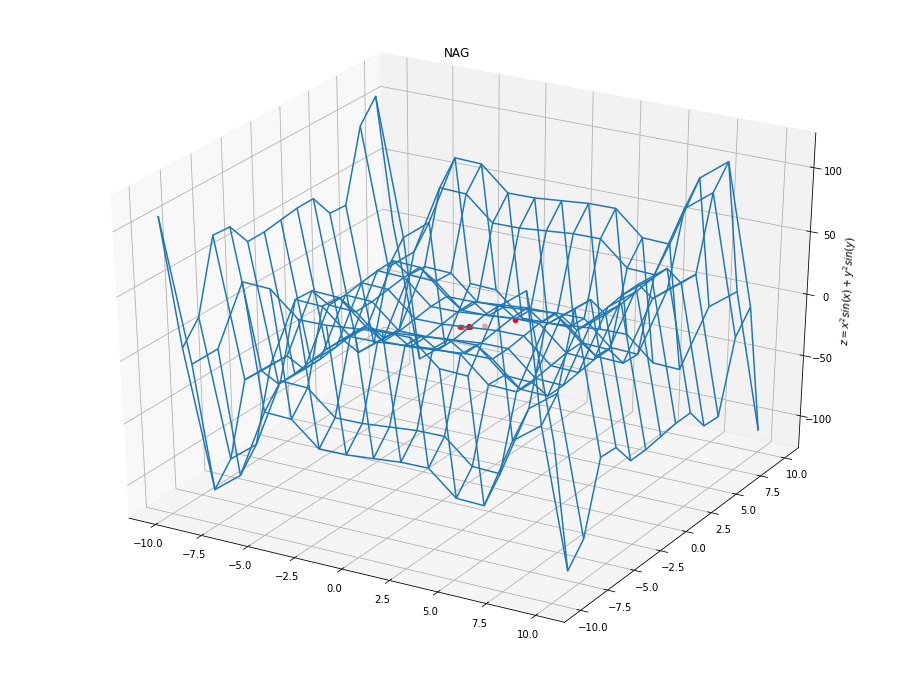

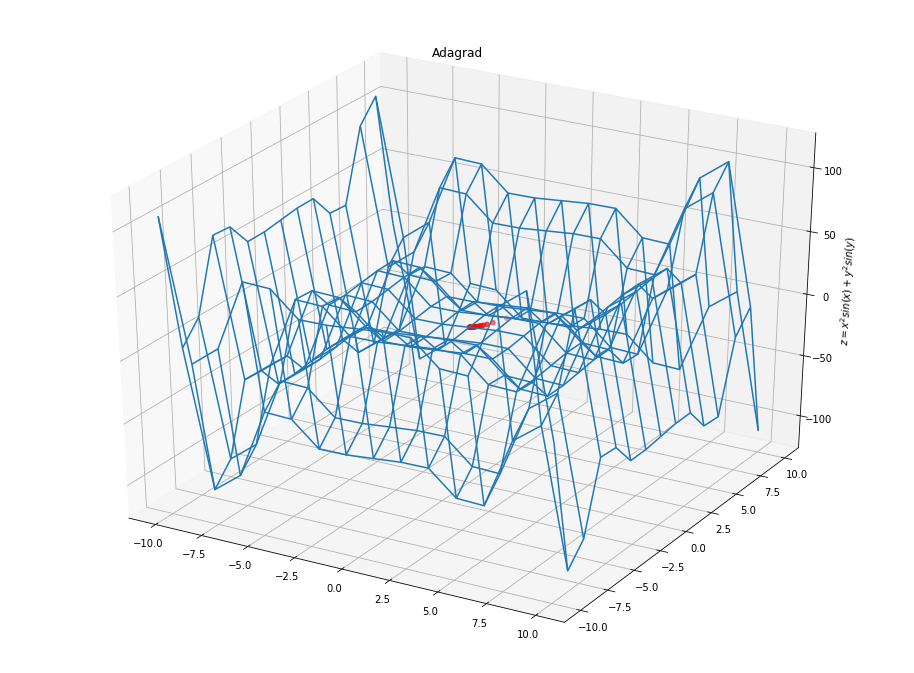

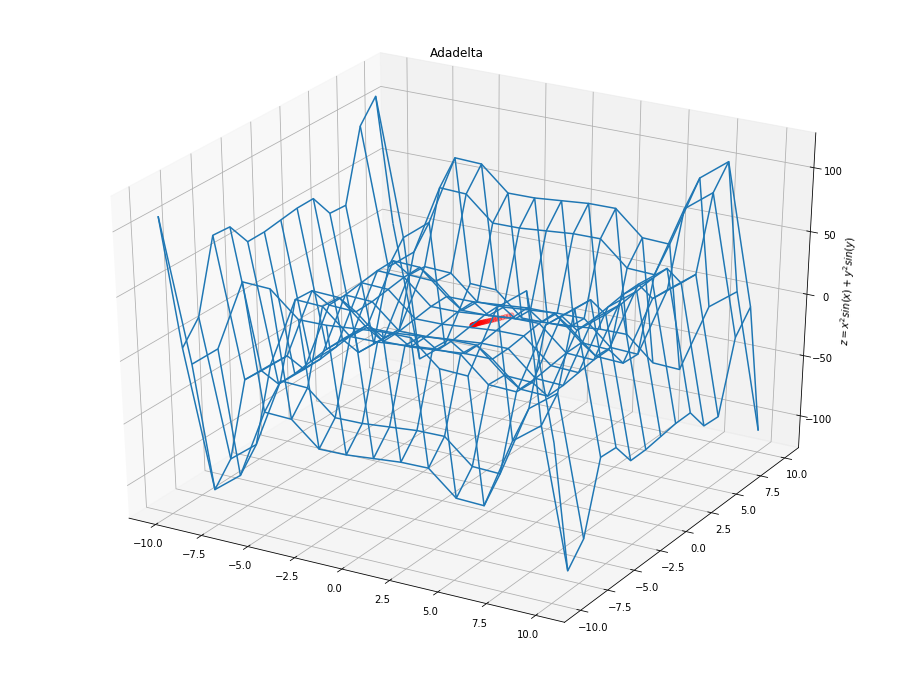

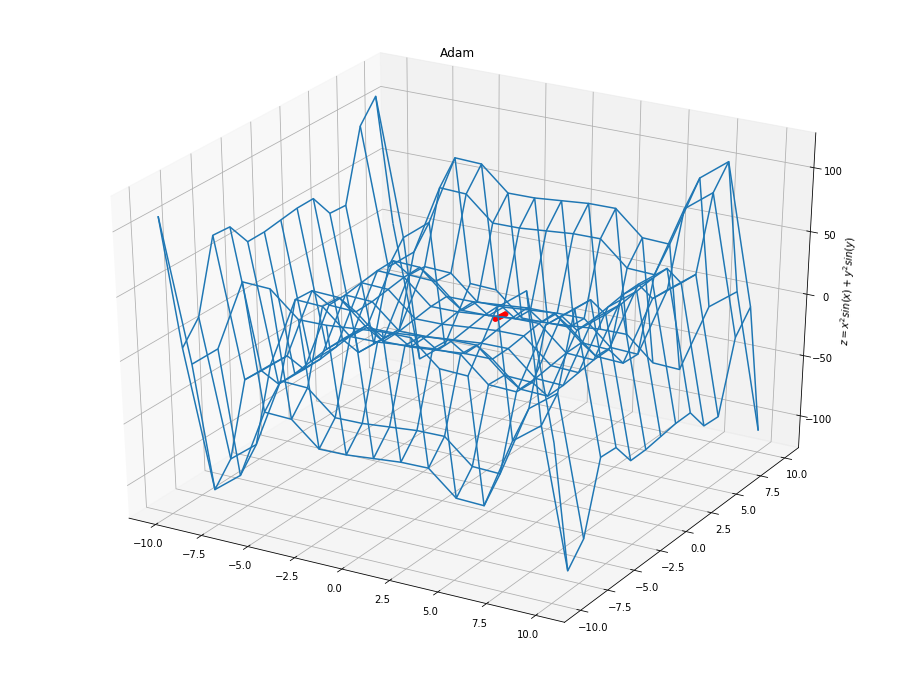

In [143]:
#Здесь взяты последние 10 точек, видно, что Adam круче всех сходится, обычный спуск - хуже всех
plot(GD(f,2,df)[0], GD(f,2,df)[1], choice_f=2, choice_m='GD')
plot(Momentum(f,2,df)[0], Momentum(f,2,df)[1], choice_f=2, choice_m='Momentum')
plot(NAG(f,2,df)[0], NAG(f,2,df)[1], choice_f=2, choice_m='NAG')
plot(Adagrad(f,2,df)[0], Adagrad(f,2,df)[1], choice_f=2, choice_m='Adagrad')
plot(Adadelta(f,2,df)[0], Adadelta(f,2,df)[1], choice_f=2, choice_m='Adadelta')
plot(Adam(f,2,df)[0], Adam(f,2,df)[1], choice_f=2, choice_m='Adam')

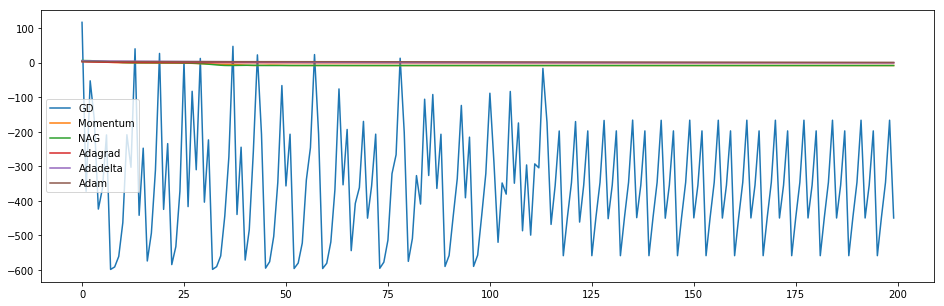

In [144]:
last_val = 50
figsize=(16, 12)
plt.figure()
plt.figure(figsize=(16, 5))
plt.plot(GD(g,2,dg)[0], label = 'GD')
plt.plot(Momentum(g,2,dg)[0], label = 'Momentum')
plt.plot(NAG(g,2,dg)[0], label = 'NAG' )
plt.plot(Adagrad(g,2,dg)[0], label = 'Adagrad')
plt.plot(Adadelta(g,2,dg)[0], label = 'Adadelta')
plt.plot(Adam(g,2,dg)[0], label = 'Adam')

plt.legend()

<i>1.3 Сравните эти методы на функции $J(x,y)=x^2sin(x^2)+y^2sin(y^2)$</i>

In [145]:
j = lambda X: X[0]**2 * np.sin(X[0]**2) + X[1]**2 *  np.sin(X[1]**2)
dj = lambda X: np.array([2*X[0]*np.sin(X[0]**2) + 2*X[0]**3*np.cos(X[0]), 2*X[1]*np.sin(X[1]**2) + 2*X[1]**3*np.cos(X[1])])

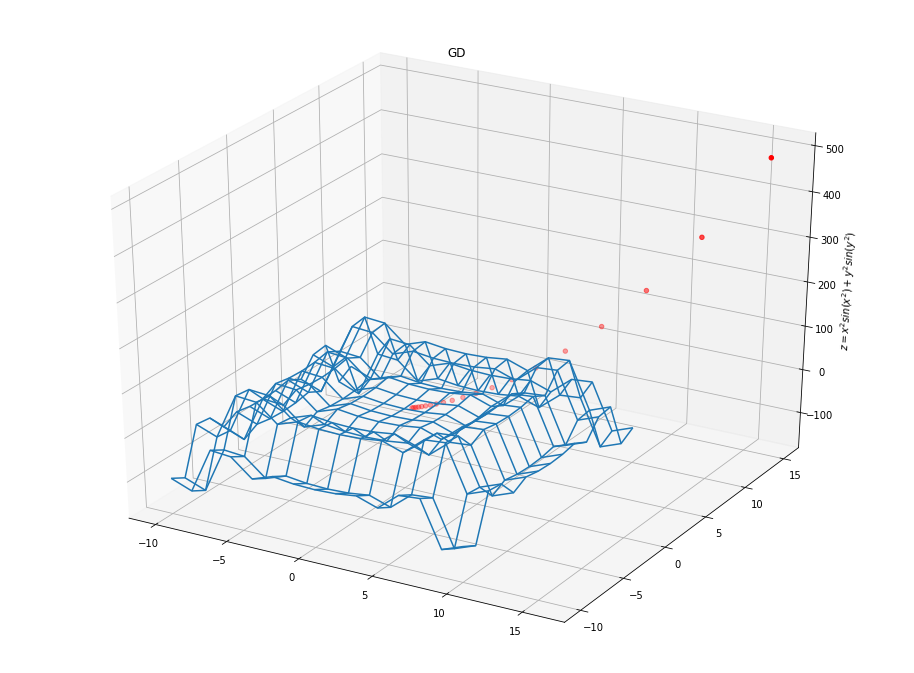

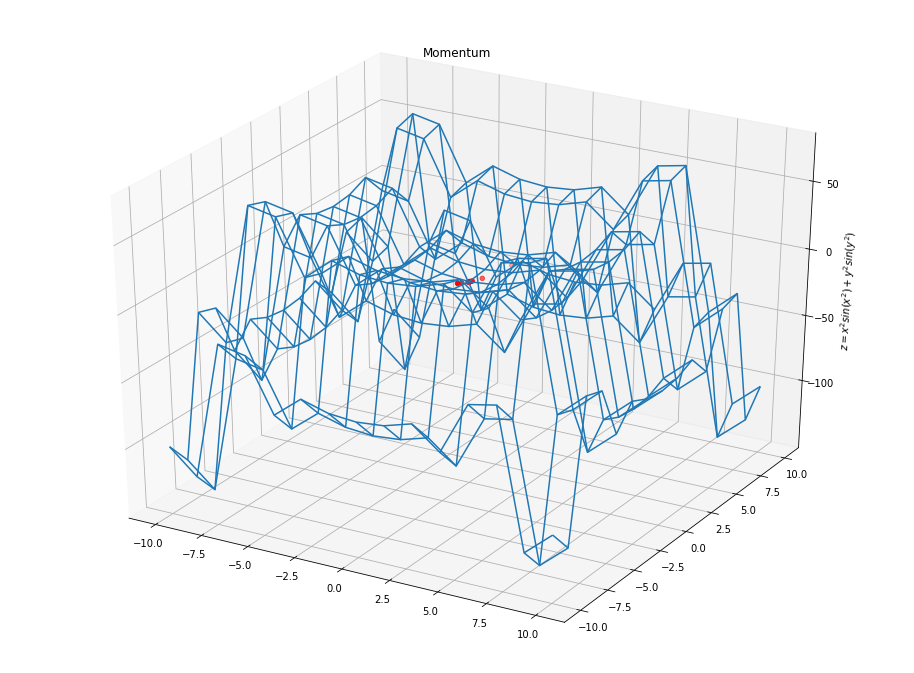

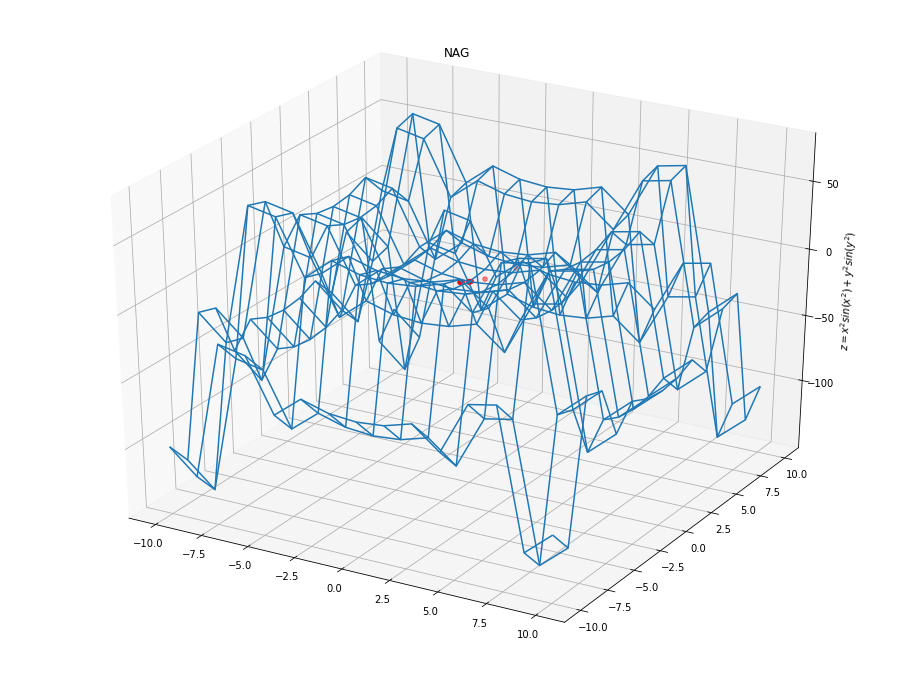

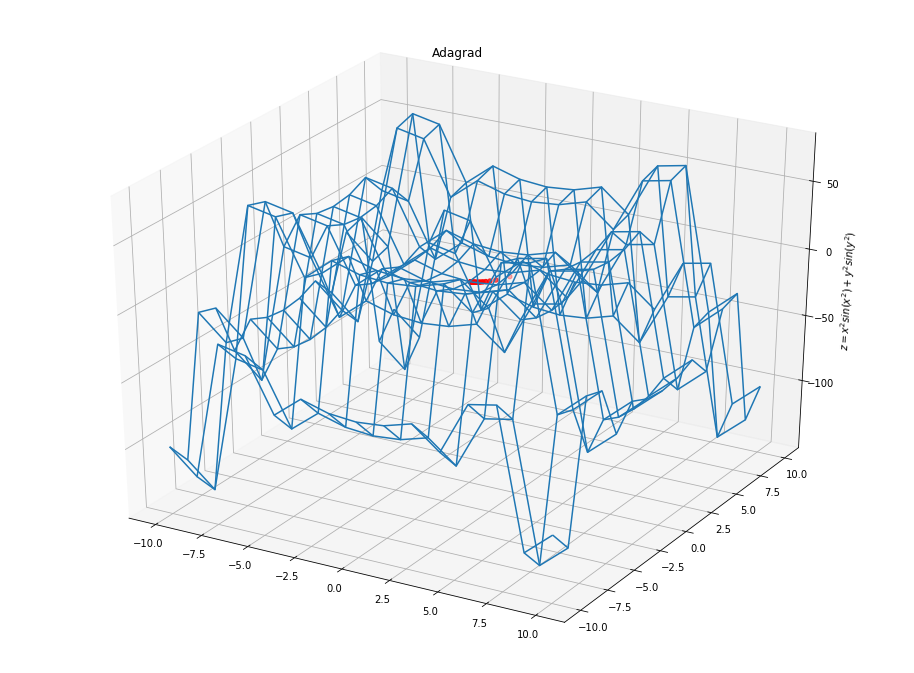

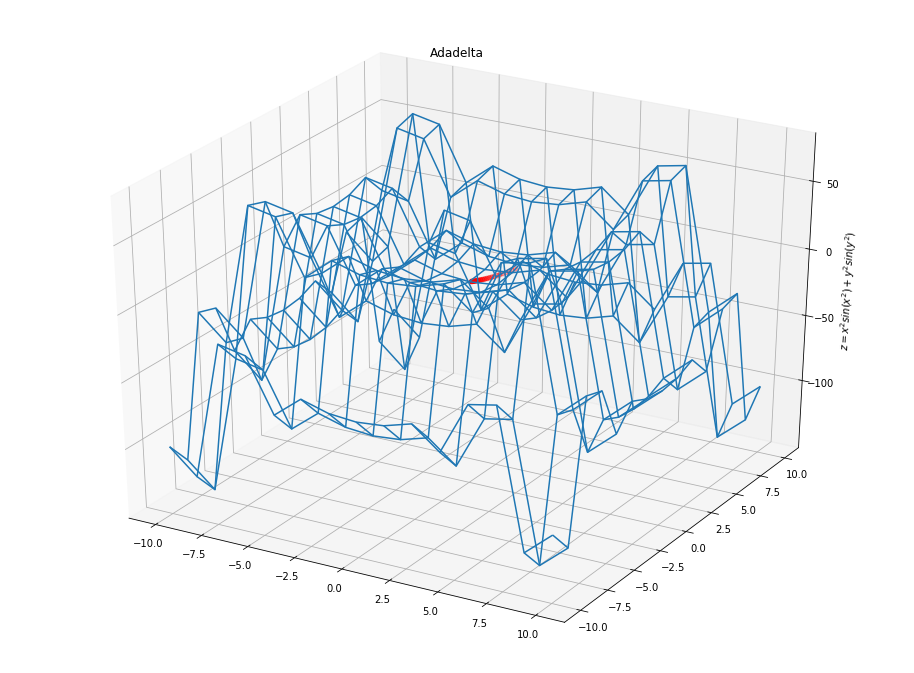

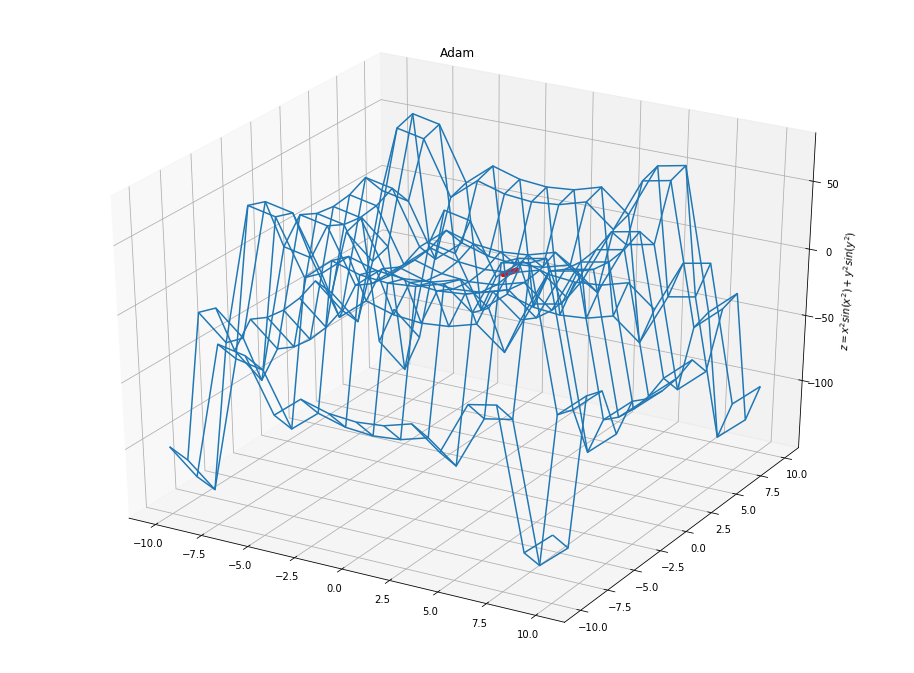

In [146]:
plot(GD(f,2,df)[0], GD(f,2,df)[1], choice_f=3, choice_m='GD')
plot(Momentum(f,2,df)[0], Momentum(f,2,df)[1], choice_f=3, choice_m='Momentum')
plot(NAG(f,2,df)[0], NAG(f,2,df)[1], choice_f=3, choice_m='NAG')
plot(Adagrad(f,2,df)[0], Adagrad(f,2,df)[1], choice_f=3, choice_m='Adagrad')
plot(Adadelta(f,2,df)[0], Adadelta(f,2,df)[1], choice_f=3, choice_m='Adadelta')
plot(Adam(f,2,df)[0], Adam(f,2,df)[1], choice_f=3, choice_m='Adam')

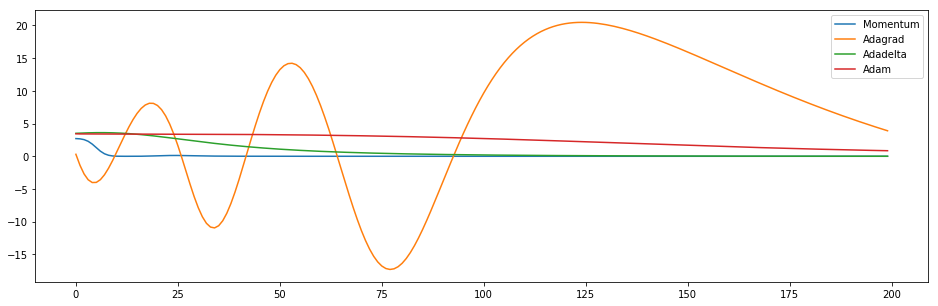

In [147]:
#GD и NAG зачеркнули, так как с ними результаты не очень из-за их больший значений.
last_val = 50
figsize=(16, 12)
plt.figure()
plt.figure(figsize=(16, 5))
#plt.plot(GD(j,2,dj)[0], label = 'GD')
plt.plot(Momentum(j,2,dj)[0], label = 'Momentum')
#plt.plot(NAG(j,2,dj)[0], label = 'NAG' )
plt.plot(Adagrad(j,2,dj)[0], label = 'Adagrad')
plt.plot(Adadelta(j,2,dj)[0], label = 'Adadelta')
plt.plot(Adam(j,2,dj)[0], label = 'Adam')

plt.legend()

##  Часть 2: Обучение нейронной сети

In [148]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torch import nn
from torch.autograd import Variable
from __future__ import division
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [149]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST('.', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


<i> 2.1 Сравните графики обучения для полносвязной нейросети на методах Adam, NAG и SGD (на MNIST). </i>

In [150]:
X_test = test_dataset.test_data.view(test_dataset.test_data.size(0), -1)
y_test = test_dataset.test_labels.numpy()

In [151]:
D_in, H, D_out = 784, 100, 10

flag_final_SGD = []
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Sigmoid(),
          torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.CrossEntropyLoss()
#loss_fn = nn.NLLLoss()
learning_rate = 1e-3

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(9):
    flag = []
    for X, Y in train_loader:
        
        X = X.view(X.size(0), -1)
        #print (X.size())
        x = Variable(X, requires_grad=False)
        y = Variable(Y, requires_grad=False)

        y_pred = model.forward(x)

        #loss = -loss_fn(y_pred, y)
        #print(t, loss.data[0])
        loss =  loss_fn(y_pred, y)
        flag.append(loss.data[0])
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    flag_final_SGD.append(np.array(flag).mean())

    X_test = X_test.type(torch.FloatTensor)
    print (accuracy_score(predict(model, X_test), y_test))

0.4983
0.6318
0.6612
0.679
0.6881
0.6923
0.6948
0.7029
0.7122


In [152]:
D_in, H, D_out = 784, 100, 10

flag_final_NAG = []
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Sigmoid(),
          torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.CrossEntropyLoss()
#loss_fn = nn.NLLLoss()
learning_rate = 1e-3

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, nesterov=True, momentum=0.9)

for t in range(9):
    flag = []
    for X, Y in train_loader:
        
        X = X.view(X.size(0), -1)
        #print (X.size())
        x = Variable(X, requires_grad=False)
        y = Variable(Y, requires_grad=False)

        y_pred = model.forward(x)

        #loss = -loss_fn(y_pred, y)
        #print(t, loss.data[0])
        loss =  loss_fn(y_pred, y)
        flag.append(loss.data[0])
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    flag_final_NAG.append(np.array(flag).mean())

    X_test = X_test.type(torch.FloatTensor)
    print (accuracy_score(predict(model, X_test), y_test))

0.719
0.8159
0.8501
0.8696
0.8779
0.8876
0.893
0.896
0.8979


In [153]:
D_in, H, D_out = 784, 100, 10

flag_final_Adam = []
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Sigmoid(),
          torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.CrossEntropyLoss()
#loss_fn = nn.NLLLoss()
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(9):
    flag = []
    for X, Y in train_loader:
        
        X = X.view(X.size(0), -1)
        #print (X.size())
        x = Variable(X, requires_grad=False)
        y = Variable(Y, requires_grad=False)

        y_pred = model.forward(x)

        #loss = -loss_fn(y_pred, y)
        #print(t, loss.data[0])
        loss =  loss_fn(y_pred, y)
        flag.append(loss.data[0])
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    flag_final_Adam.append(np.array(flag).mean())

    X_test = X_test.type(torch.FloatTensor)
    print (accuracy_score(predict(model, X_test), y_test))

0.9358
0.949
0.9594
0.9637
0.9663
0.9675
0.9692
0.9721
0.973


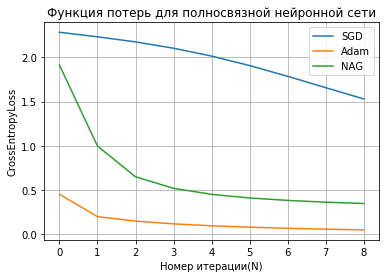

In [154]:
#Вполне предсказуемый результат
plt.figure()
plt.title(u"Функция потерь для полносвязной нейронной сети")
plt.xlabel(u"Номер итерации(N)")
plt.ylabel(u"CrossEntropyLoss")
plt.grid()
plt.plot(flag_final_SGD, label = 'SGD')
plt.plot(flag_final_Adam, label = 'Adam')
plt.plot(flag_final_NAG, label = 'NAG')
plt.legend()

<i> 2.2 Сравните графики обучения для сверточной нейросети на методах Adam, NAG и SGD. </i>

In [187]:
import torchvision.datasets as dset
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)



In [188]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size=32,
                                           shuffle=True, 
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,
                                          batch_size=32,
                                          shuffle=False, 
                                          drop_last=True)

In [236]:
conv_flag_final_SGD = []
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)


model = CNN()

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(9):
    flag = []
    for X, Y in train_loader:
        
        x = Variable(X)
        y = Variable(Y)
      
        y_pred = model.forward(x)

        
        loss =  loss_fn(y_pred, y)
        flag.append(loss.data[0])
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    print (np.array(flag).mean())
    conv_flag_final_SGD.append(np.array(flag).mean())

    #X_test = X_test.type(torch.FloatTensor)
    
    #print (accuracy_score(predict(model, X_test), y_test))
    

2.14211526235
0.688094600177
0.397190295136
0.357246861845
0.336768257562
0.320774017572
0.307512000718
0.295101746619
0.282929964715


In [237]:
conv_flag_final_NAG = []
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)


model = CNN()

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, nesterov = True, momentum = 0.9)

for t in range(9):
    flag = []
    for X, Y in train_loader:
        
        x = Variable(X)
        y = Variable(Y)

        y_pred = model.forward(x)

        
        loss =  loss_fn(y_pred, y)
        flag.append(loss.data[0])
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    print (np.array(flag).mean())
    conv_flag_final_NAG.append(np.array(flag).mean())

    X_test = X_test.type(torch.FloatTensor)

0.516910380032
0.225131390264
0.158661211033
0.124648180768
0.104009659966
0.0920677824762
0.0833992538322
0.0766647174408
0.0716848241458


In [238]:
conv_flag_final_Adam = []
def predict(model, x_val):
    
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)


model = CNN()

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(9):
    flag = []
    for X, Y in train_loader:
        
        x = Variable(X)
        y = Variable(Y)

        y_pred = model.forward(x)

        
        loss =  loss_fn(y_pred, y)
        flag.append(loss.data[0])
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    print (np.array(flag).mean())
    conv_flag_final_Adam.append(np.array(flag).mean())

    X_test = X_test.type(torch.FloatTensor)

0.238173078703
0.0849167987136
0.0629182772849
0.0491145664657
0.0417275616301
0.0351618653481
0.0303195754767
0.0256986337707
0.0221748225196


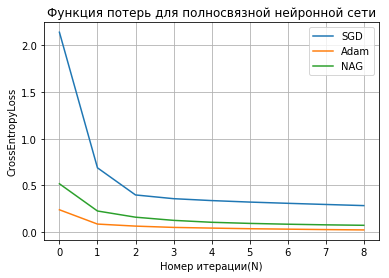

In [239]:
#В принципе, результат здесь тоже предсказуемый.
plt.figure()
plt.title(u"Функция потерь для полносвязной нейронной сети")
plt.xlabel(u"Номер итерации(N)")
plt.ylabel(u"CrossEntropyLoss")
plt.grid()
plt.plot(conv_flag_final_SGD, label = 'SGD')
plt.plot(conv_flag_final_Adam, label = 'Adam')
plt.plot(conv_flag_final_NAG, label = 'NAG')
plt.legend()

#### Feedback (опционально)

Здесь вы можете оставить список опечаток из лекции или семинара:

Здесь вы можете оставить комментарии по лекции или семинару: